<a href="https://colab.research.google.com/github/GRUPPE-BINA24/Datenspeicher/blob/main/Versuch_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering durchschnittliche Mietpreise/m2 nach Kantone (k-Means)

In [1]:
#Setup installations
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.2 MB/s eta 0:00:00


In [3]:
#Load Libraries

from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


# from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [24]:
#Upload Data

df = pd.read_excel('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx')

df.head()


,Kanton,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,Aargau,15.9,15.8,15.7,15.5,15.6,15.1,15.1,15.0,15.5,15.5,15.2
1,Appenzell A.Rh.,13.8,14.0,13.9,13.4,12.8,12.8,12.6,13.0,13.1,12.9,12.9
2,Appenzell I.Rh.,15.9,15.2,14.0,15.7,14.4,15.0,13.2,12.9,14.1,13.7,13.9
3,Basel-Landschaft,17.4,17.3,17.2,17.0,16.9,16.7,16.3,16.3,17.0,16.5,16.9
4,Basel-Stadt,18.2,18.0,17.7,17.7,17.4,16.8,16.9,16.4,16.8,16.7,16.6


In [6]:
#Checkin Data Structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Kanton  28 non-null     object 
 1   2022    28 non-null     float64
 2   2021    28 non-null     float64
 3   2020    28 non-null     float64
 4   2019    28 non-null     float64
 5   2018    28 non-null     float64
 6   2017    28 non-null     float64
 7   2016    28 non-null     float64
 8   2015    28 non-null     float64
 9   2014    28 non-null     float64
 10  2013    28 non-null     float64
 11  2012    28 non-null     float64
dtypes: float64(11), object(1)
memory usage: 2.8+ KB


In [26]:
# Making Kantone as İndex
df.index = df.iloc[:,0]

df = df.iloc[:, 1:]

df.head()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
Kanton,,,,,,,,,,,
Aargau,15.9,15.8,15.7,15.5,15.6,15.1,15.1,15.0,15.5,15.5,15.2
Appenzell A.Rh.,13.8,14.0,13.9,13.4,12.8,12.8,12.6,13.0,13.1,12.9,12.9
Appenzell I.Rh.,15.9,15.2,14.0,15.7,14.4,15.0,13.2,12.9,14.1,13.7,13.9
Basel-Landschaft,17.4,17.3,17.2,17.0,16.9,16.7,16.3,16.3,17.0,16.5,16.9
Basel-Stadt,18.2,18.0,17.7,17.7,17.4,16.8,16.9,16.4,16.8,16.7,16.6


In [27]:
# Check for NULL values
df.isnull().sum()

2022    0
2021    0
2020    0
2019    0
2018    0
2017    0
2016    0
2015    0
2014    0
2013    0
2012    0
dtype: int64

In [34]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

# Clusterzuordnung für jede Zeile erhalten
clusters = kmeans.predict(df)

# Clusterzuordnung dem DataFrame hinzufügen
df['Cluster'] = clusters

# Ergebnis anzeigen
print(df)

                     2022     2021     2020    2019    2018     2017     2016  \
Kanton                                                                          
Aargau            15.9000  15.8000  15.7000  15.500  15.600  15.1000  15.1000   
Appenzell A.Rh.   13.8000  14.0000  13.9000  13.400  12.800  12.8000  12.6000   
Appenzell I.Rh.   15.9000  15.2000  14.0000  15.700  14.400  15.0000  13.2000   
Basel-Landschaft  17.4000  17.3000  17.2000  17.000  16.900  16.7000  16.3000   
Basel-Stadt       18.2000  18.0000  17.7000  17.700  17.400  16.8000  16.9000   
Bern              18.2000  18.0000  17.7000  17.700  17.400  16.8000  16.9000   
Freiburg          15.2000  15.2000  14.8000  14.500  14.700  14.8000  14.5000   
Genf              20.3000  19.7000  19.7000  19.500  18.900  18.5000  18.4000   
Glarus            14.0000  13.9000  14.0000  13.000  13.100  12.7000  13.6000   
Graubünden        15.8000  15.7000  15.4000  15.800  15.600  15.3000  15.3000   
Jura              12.2000  1

<Figure size 1000x600 with 0 Axes>

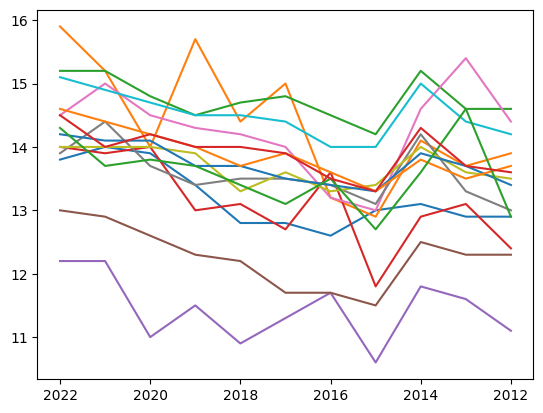

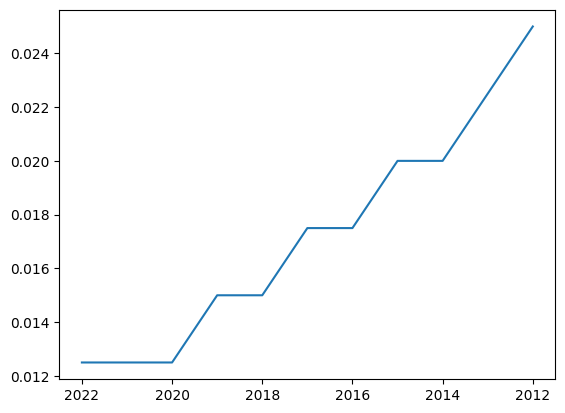

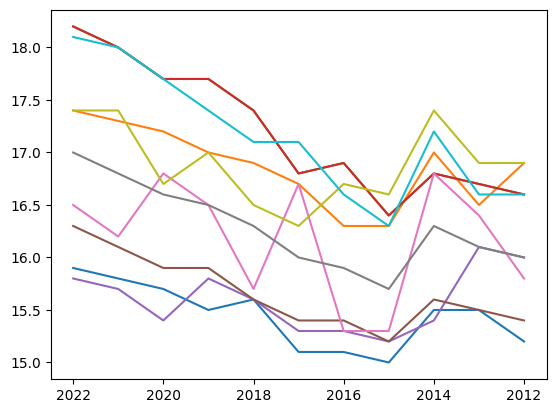

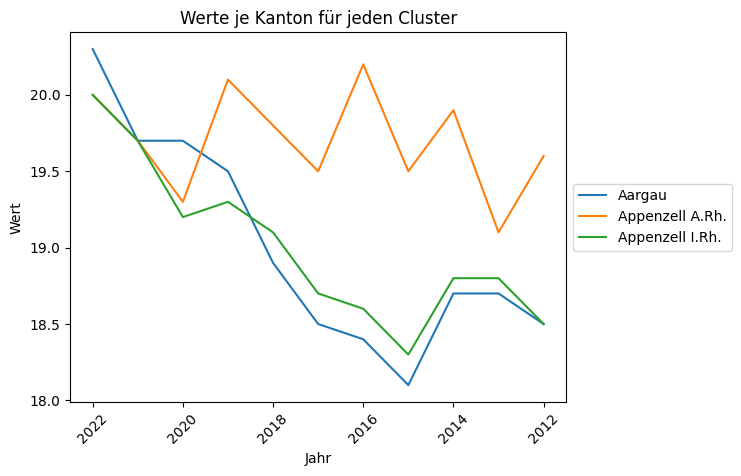

In [37]:
plt.figure(figsize=(10, 6))
for cluster_id in range(4):
    cluster_data = df[df['Cluster'] == cluster_id].drop(columns=['Cluster'])
    cluster_data.T.plot(legend=False)
plt.title('Werte je Kanton für jeden Cluster')
plt.xlabel('Jahr')
plt.ylabel('Wert')
plt.xticks(rotation=45)
plt.legend(df.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()